# Manual intialization of an allosteric network

Begin with a few package imports:

In [1]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

from packing_utils import *
from allosteric_utils import *
from plot_imports import *

### Graph specification

For small networks, it may be useful to directly specify the node positions and edge connections from which a graph should be constructed. Consider the example below of 5 nodes and 8 edges. This graph can be specified as follows:

In [2]:
# Initialize a graph of 5 nodes, without any connections to start.
n = 5
graph = nx.empty_graph(n=n)

Specify node positions. Since this is a 2D network, all z coordinates are 0.

In [3]:
pos = np.array([[-1,1,0], [1,1,0], [0,0,0], [-1,-1,0], [1,-1,0]])

nx.set_node_attributes(graph, np.zeros(3), 'pos') # intialize all positions to a placeholder value of (0,0,0)
for i in range(n):
    graph.nodes[i]['pos'] = pos[i] # overwrite with correct coordinates

Finally, specify the connected edges.

In [4]:
# Each edge pair specifies the indices of the connected nodes.
edges = np.array([[0,1], [0,2], [0,3], [1,2], [1,4], [2,3], [2,4], [3,4]])

for edge in edges:
    i, j = edge
    graph.add_edge(i,j)

### Source and target specification

Initialize an Allosteric Class object directly from the graph:

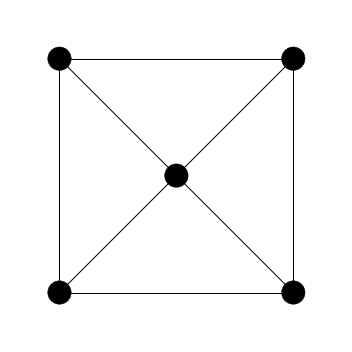

In [5]:
%matplotlib inline

allo = Allosteric(graph, dim=2)
allo.plot()

Next we manually click on nodes to select source and target. Note this requires the interactive `%matplotlib notebook` setting. Here we click on the top two nodes to specify our source, which will be marked with a blue dot. If a connected edge is selected, the edge will be subsequently removed.

<IPython.core.display.Javascript object>


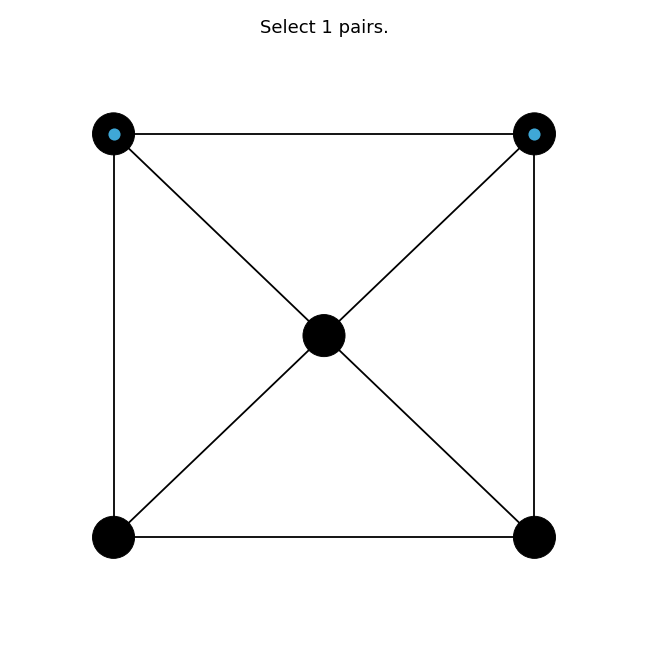

In [6]:
%matplotlib notebook

allo.add_sources(1, auto=False)

Next click on the bottom two nodes to specify the target, which will be marked with a red dot.

<IPython.core.display.Javascript object>


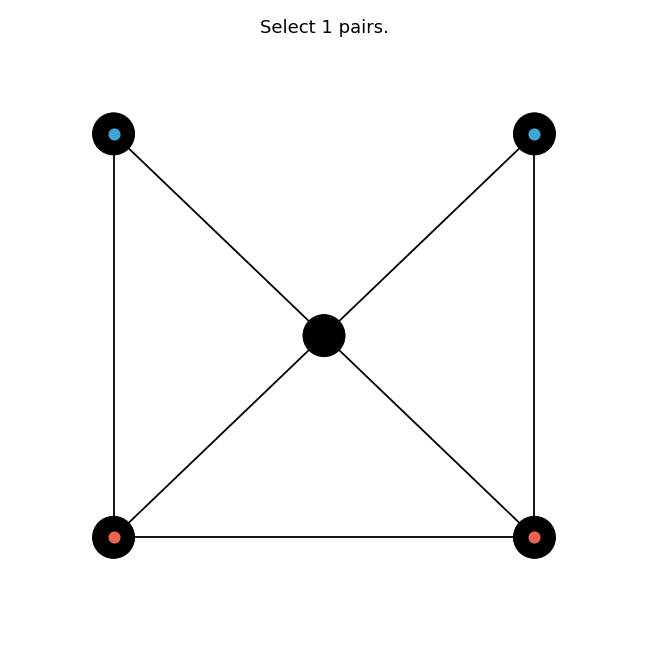

In [7]:
%matplotlib notebook

allo.add_targets(1, auto=False)

Notice the edges connecting the source pair and target pair have been removed.

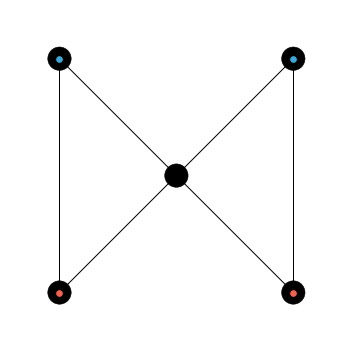

In [8]:
%matplotlib inline

allo.plot()

### Animation

Apply a sinusoidal strain at the source and monitor the target:

progress: 100%|################################################| 40000000.00/40000000.00 [00:03<00:00]


<IPython.core.display.Javascript object>


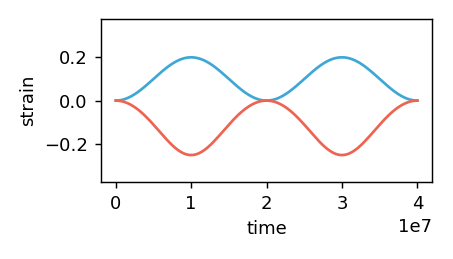

In [9]:
%matplotlib notebook

allo.reset_init()

duration = 4e7
es = 0.2                # source strain of 20%
et = 0.2                # target strain of 20%
ka = 100.               # stiffness of spring for applied strain
frames = 200
period = 2e7

sol = allo.solve(duration=duration, frames=frames, T=period, applied_args=(es, 0, ka))
allo.strain_plot()

The following cell produces a movie of the network as it undergoes the sinusoidal strain:

In [ ]:
%matplotlib inline

ani = allo.animate()
HTML(ani.to_html5_video())